In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [19]:
mcdonalds = pd.read_csv("mcdonalds.csv")
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [20]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [21]:
mcdonalds.shape

(1453, 15)

In [22]:
# checking for null data --> No null data
mcdonalds.info()
mcdonalds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [23]:
MD = mcdonalds.iloc[:, 0:12]
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4


In [24]:
MD =MD.replace(['Yes','No'],[1,0])
MD.Like=MD.Like.replace(['I love it!+5','I hate it!-5'],[5,-5])

In [25]:
MD.Like= MD.Like.apply(pd.to_numeric)

In [26]:
MD.dtypes

yummy         int64
convenient    int64
spicy         int64
fattening     int64
greasy        int64
fast          int64
cheap         int64
tasty         int64
expensive     int64
healthy       int64
disgusting    int64
Like          int64
dtype: object

In [27]:
MDx = MD.iloc[:, 0:12]
MDx

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like
0,0,1,0,1,0,1,1,0,1,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4
4,0,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5
1449,1,1,0,1,0,0,1,1,0,1,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,4


In [28]:
scaler = StandardScaler()
MD_std = scaler.fit_transform(MDx)

In [29]:
MD_std

array([[-1.11147857,  0.31873518, -0.32134871, ..., -0.49827882,
        -0.56648839, -1.21222481],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.49827882,
        -0.56648839,  0.39251521],
       [-1.11147857,  0.31873518,  3.11188424, ...,  2.00690848,
        -0.56648839,  0.07156721],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.49827882,
        -0.56648839,  0.71346322],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  2.00690848,
        -0.56648839,  1.03441123],
       [-1.11147857,  0.31873518, -0.32134871, ..., -0.49827882,
         1.76526126, -1.21222481]])

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

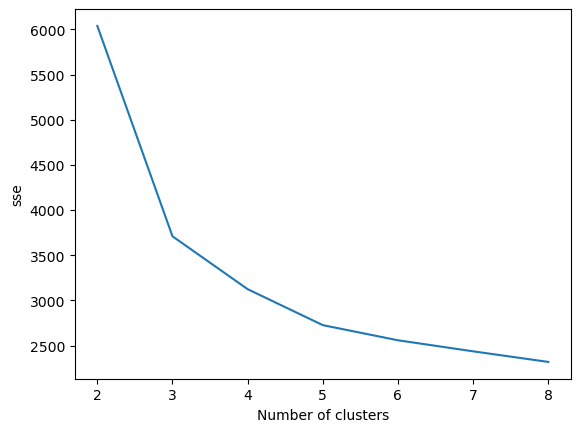

In [30]:
k_range = range(2, 9)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MDx)
    sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel("Number of clusters")
plt.ylabel("sse")
plt.show()


In [31]:
pca = PCA()
X_pca = pca.fit_transform(MD_std)

D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


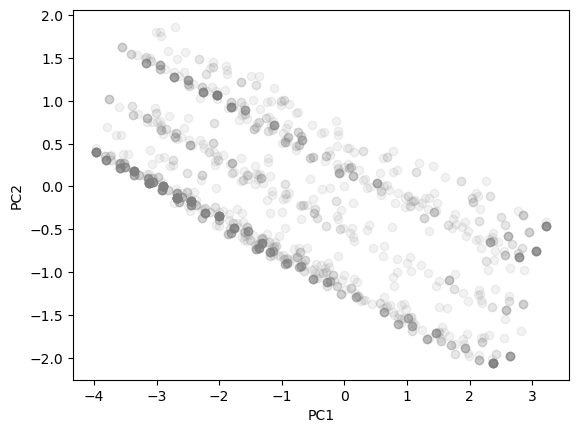

In [32]:
plt.scatter(pca.transform(MDx)[:, 0], pca.transform(MDx)[:, 1], color="grey",alpha=0.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [33]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

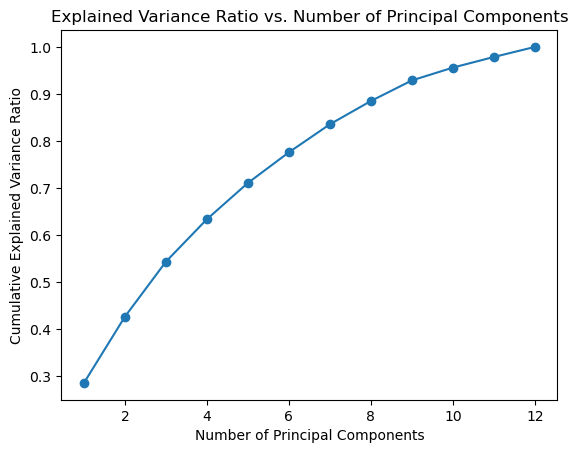

In [34]:
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [35]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


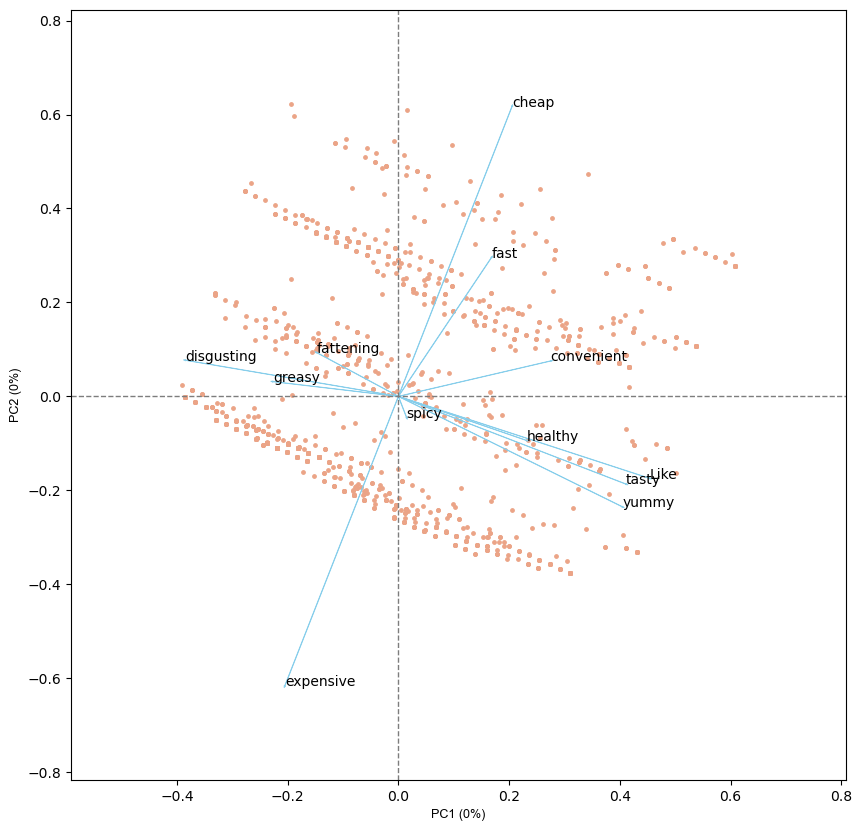

In [36]:
load = (pca.components_)
from bioinfokit.visuz import cluster
cluster.biplot(cscore=X_pca, loadings=-load, labels=MDx.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

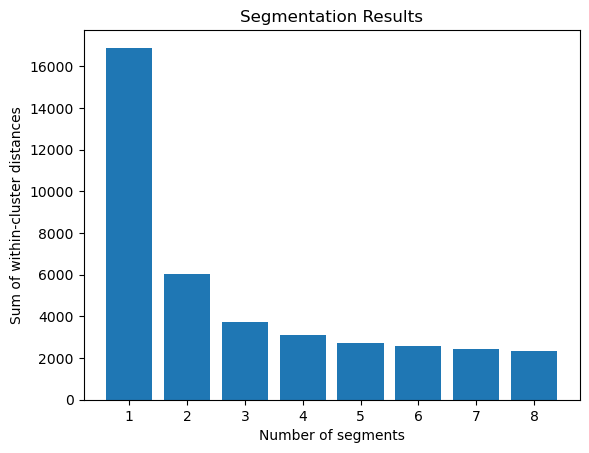

In [37]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MDx)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

In [38]:
from sklearn.mixture import GaussianMixture
MDg1= GaussianMixture(n_components=4)
MDg1.fit(MDx)

log_likelihood_MDg1 = MDg1.score(MD)

MDg2 = GaussianMixture(n_components=4)
MDg2.fit(MD)

log_likelihood_MDg2 = MDg2.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_MDg1)
print("Log-likelihood for MD.m4:", log_likelihood_MDg2)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Log-likelihood for MD.m4a: 12.44074965777095
Log-likelihood for MD.m4: 11.623001865023745


In [39]:
like_counts = pd.value_counts(MDx['Like'])
reversed_counts = like_counts.iloc[::-1]

reversed_counts

Like
-1     58
-2     59
-4     71
-3     73
 5    143
-5    152
 1    152
 4    160
 0    169
 2    187
 3    229
Name: count, dtype: int64

In [40]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MDx)
kmeans_clusters = kmeans.predict(MDx)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MDx)
gmm_clusters = gmm.predict(MDx)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD2 = MDx[results['mixture'] == 3] 

k_m = KMeans(n_clusters=4, random_state=1234)
k_m.fit(MD)
k_m_clusters = k_m.predict(MD2)

results_m4 = pd.DataFrame({'kmeans': k_m_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

mixture   0    1   2   3    4    5  6   7
kmeans                                   
0        29   17  25   9  107  211  1  17
1         0  221  32  22    7   46  9  11
2        57    0  14   1   61  156  0  14
3        21   66  47  17   51  158  5  21
kmeans  0  1  2  3
kmeans            
0       4  8  1  5
1       1  5  0  6
2       2  4  0  2
3       2  5  0  4


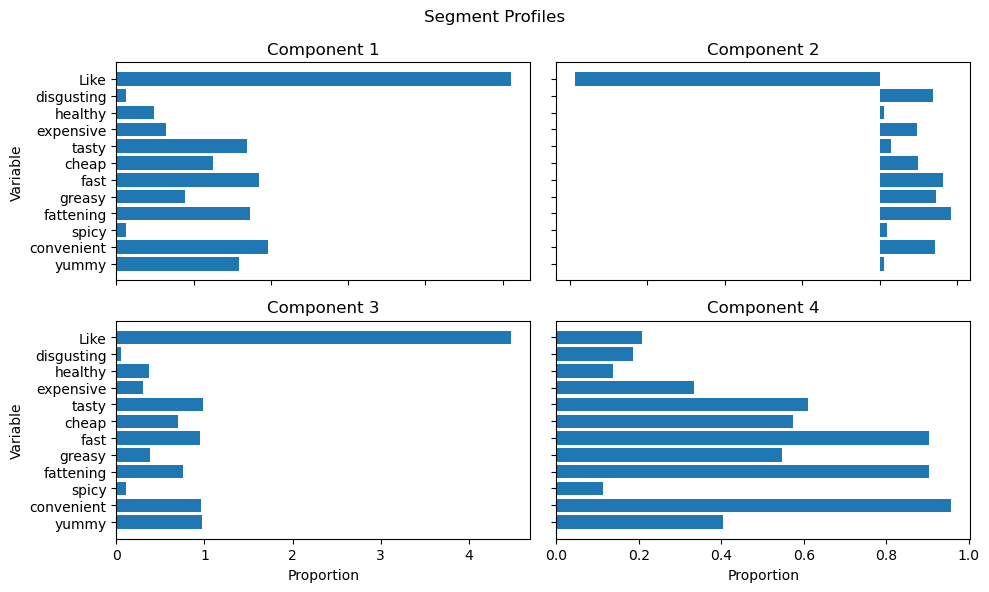

In [41]:
kmeans = MD_km['4']

labels = kmeans.labels_

MD_mean = MDx.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MDx.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

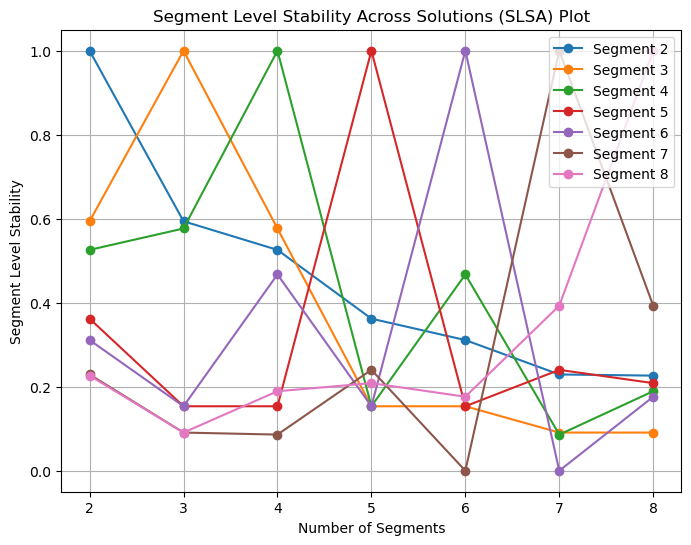

In [42]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

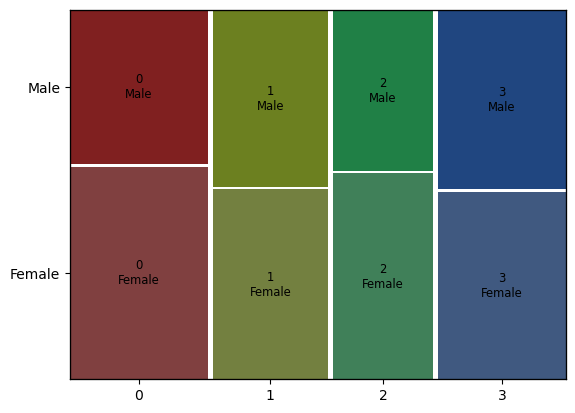

In [43]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

In [44]:
m=mcdonalds.copy()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


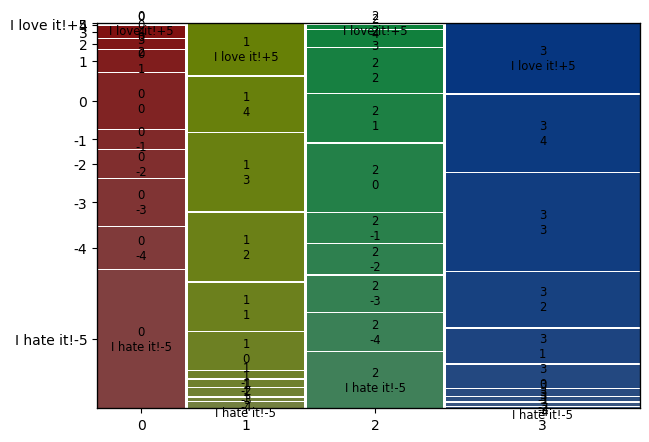

In [45]:
from sklearn.preprocessing import LabelEncoder
def label(x):
    m[x] = LabelEncoder().fit_transform(m[x])
    return m

lab = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in lab:
    label(i)
m
df = m.loc[:,lab]
df
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)
m['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(m['cluster_num'],m['Like'])
#Reordering cols
m
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [49]:
m['VisitFrequency'] = LabelEncoder().fit_transform(m['VisitFrequency'])
visit = m.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.691667
1,1,2.549206
2,2,2.717742
3,3,2.610266


In [46]:
m['Like'] = LabelEncoder().fit_transform(m['Like'])
Like = m.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.275000
1,1,6.453968
2,2,4.443548
3,3,7.043726


In [47]:
m['Gender'] = LabelEncoder().fit_transform(m['Gender'])
Gender = m.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.579167
1,1,0.526984
2,2,0.416667
3,3,0.389734


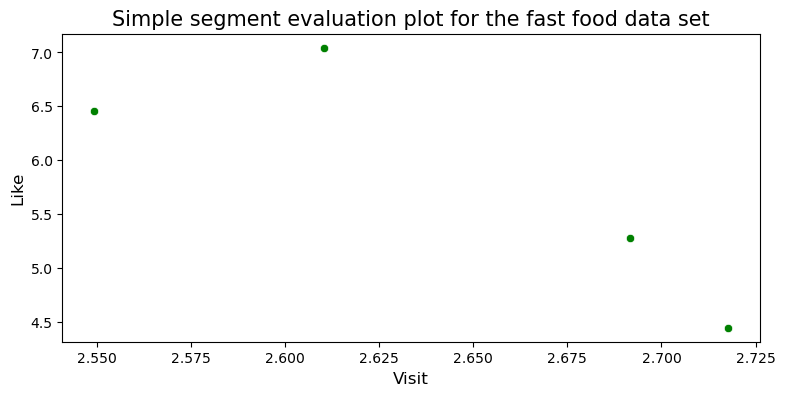

In [53]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,color='g')
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()